# Entregável 3 de Visão Computacional e Robótica


Entrega até **13/09**

Pode ser feito **em quartetos** (no máximo).
Escreva abaixo os nomes dos integrantes:

**Link para o vídeo da parte 5**:

**Link para o vídeo da parte 6 - Final**:

In [1]:
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import biblioteca

if (sys.version_info > (3, 0)): 
    # Modo Python 3
    import importlib
    importlib.reload(biblioteca) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    # Modo Python 2
    reload(biblioteca)

### Carregar as imagens

A seguir, vocês podem alterar qual imagem de teste esta sendo utilizada no notebook, o codigo deve funcionar em todas as 3.


In [2]:
img1 = cv2.imread("img/frame01.jpg")
img2 = cv2.imread("img/frame02.jpg")
img3 = cv2.imread("img/frame03.jpg") # Mais dificil

img =img1.copy() # Trocar o numero da imagem.

Ouça a explicação do professor sobre detecção de retas em imagens.
Nas tarefas a seguir, você irá usar um estimador linear de mínimos quadrados.

## Parte 1
### Segmentar Linhas Amarelas
Modifique a função `segmenta_linha_amarela` do arquivo [biblioteca.py](biblioteca.py) para segmentar as linhas amarelas no centro da pista.

Utiliza a função cv2.morphologyEx() para limpar ruidos na imagem

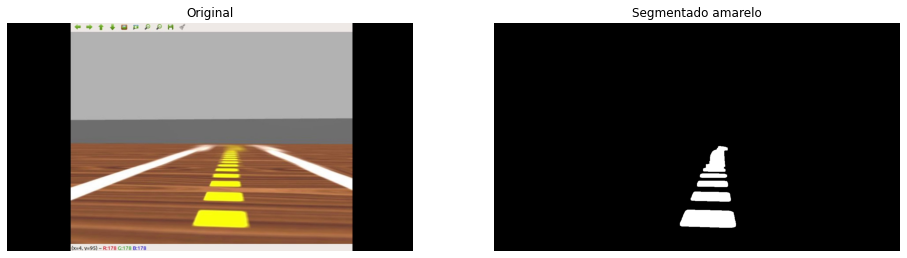

In [3]:
# Segmentar Linha
mask = biblioteca.segmenta_linha_amarela(img)

# Plot
f, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(mask, cmap="gray")
ax[0].set_title('Original')
ax[1].set_title('Segmentado amarelo')

ax[0].axis('off')
ax[1].axis('off')

plt.show()

# Saida Esperada:
# Uma imagem com o as linhas amarelas da pista em branco

## Parte 2
### Segmentar Segmentos da Linha Amarela
Modifique a função `encontrar_contornos` e `encontrar_centro_dos_contornos` do arquivo [biblioteca.py](biblioteca.py) para calcular os contornos e calcular os centros de cada contorno. Na função `encontrar_centro_dos_contornos` desenhe também o centro com uma cruz.

Dica: Utilize `crosshair(img, point, size, color)` (já está pronta) para desenhar uma cruz no ponto.

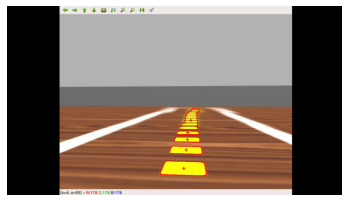

In [4]:
# Contornos
contornos = biblioteca.encontrar_contornos(mask)
cv2.drawContours(img, contornos, -1, [0, 0, 255], 2)

# # Centro de Massa
img, X, Y = biblioteca.encontrar_centro_dos_contornos(img, contornos)

# Plot
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Saida Esperada:
# Imagem original com os contornos de cada segmento denhados e uma cruz no centro de cada um.

## Parte 3
### Calcular Regressão Linear

Primeiro modifique a função `desenhar_linha_entre_pontos` do arquivo [biblioteca.py](biblioteca.py) para desenhar uma linha entre cada um dos centros dos segmentos.

Em seguida modifique a função `regressao_por_centro` do arquivo [biblioteca.py](biblioteca.py) para ajustar uma linha entre os centros dos segmentos. Desenhe a linha na imagem.

Dica: `cv2.line(img,ponto1,ponto2,color,2)` desenha uma linha que passe entre os pontos, mesmo que ponto1 e ponto2 `não pertençam` a imagem.

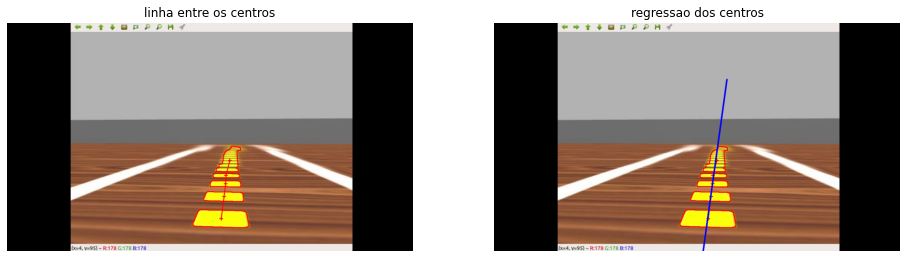

In [5]:
f, ax = plt.subplots(1, 2, figsize=(16,6))

# Desenhar Linha entre pontos
img = biblioteca.desenhar_linha_entre_pontos(img, X,Y, (255,0,0))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Regressão Linear
if X:
## Regressão pelo centro
    X = np.array(X)
    Y = np.array(Y)
    img, lm = biblioteca.regressao_por_centro(img, X,Y)

# Plot
ax[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('linha entre os centros')
ax[1].set_title('regressao dos centros')

ax[0].axis('off')
ax[1].axis('off')

plt.show()
# Saida Esperada:
# Uma imagem com uma linha entreo os centros e outra com a regrassão dos pontos

## Parte 4
### Calcular angulo com a vertical.

Modifique a função `calcular_angulo_com_vertical` do arquivo [biblioteca.py](biblioteca.py) para calcular o ângulo em graus da reta obtida anteriormente com a VERTICAL.

In [6]:
angulo = biblioteca.calcular_angulo_com_vertical(img, lm)

print("Angulo = %s"%angulo)
# Saida Esperada:
# frame01.jpg: Angulo = -7.534561718846401
# frame02.jpg: Angulo = -61.548618362057695
# frame03.jpg: Angulo = varia muito  # o correto seria -10.0

Angulo = -7.9055349190583515


## Parte 5
### Repetir em um stream de video

Agora, modifique o arquivo [run_on_video.py](run_on_video.py) com todos os recursos mostrados anteriormente, para que a linha acompanhe o movimento do robo. Deve também mostrar o angulo com a vertical na image
# **Baixe o video no link:**
### https://github.com/Insper/robot21.2/blob/main/aula03/yellow.mp4

## Parte 6
### Ponto de Fuga

Robôs que trabalham dentro de prédios precisam saber seguir corredores.

Uma das maneiras de fazer isso é o robô alinhar o centro de sua câmera ao ponto de fuga do corredor, para que sua trajetória seja aproximadamente paralela às paredes do mesmo.


O ponto de fuga é aquele para o qual as retas paralelas parecem convergir

Dada a seguinte imagem de um corredor:

![Imagem do corredor](notebook_aux/ponto_fuga.png)

Podemos traçar as linhas geradas pela perspectiva, seu ponto de encontro será o ponto de fuga.



### Revisão: reta passando por dois pontos

![Encontro de duas retas](notebook_aux/retas.png)


Seja o ponto $A:(a_x, a_y)$ e o ponto $B:(b_x, b_y)$

Queremos encontrar uma reta $r: y = mx + h$ que passa por $A$ e $B$, em que $m$ é o *coeficiente angular* e $h$ é o intercepto ou coeficiente linear da reta.

Temos que:

$m = \frac{\Delta_y}{\Delta_x} = \frac{b_y - a_y}{b_x - a_x}$

Uma vez encontrado o valor de $m$, a substituição a seguir permite encontrar a equação da reta:

$m = \frac{y - a_y}{x - a_x}$

$mx - ma_x = y - a_y$

$mx = y - a_y + ma_x$

$y = mx -ma_x + a_y$

$h = a_y - ma_x$


$y = mx - ma_x + a_y$

### Interseção de duas retas

Temos que na interseção as duas retas se encontram num ponto $(x_i, y_i)$

Sejam as retas $r1: y = m1x + h1$ e $r2: y = m2x + h2$

Vamos encontrar o ponto $x_i$ em que os valores de $y_i$ serão iguais:

$m1x_i + h1 = m2x_i + h2$

$(m1 - m2)x_i = h2 - h1$

$x_i = \frac{h2 - h1}{m1 - m2}$

$y_i = m1x_i + h1$

**Dados de teste:**

Caso precise testar seu código, você pode conferir com estes valores. As retas definidas por pontos $r1: (P_1, P_2)$ e $r2: (Q_1, Q_2)$, para os valores:

```python

p1 = (3.0, 2.5)
p2 = (4.0, 0.6)
q1 = (1.0, 2.4)
q2 = (0.6, 1.1)
```

Encontram-se no ponto `(1.7572 4.8611)`


Pede-se: 

* A partir do ponto para onde convergem as linhas do corredor, marque o ponto de fuga no vídeo.  Você precisa mostrar as retas que vão convergir.


**Sugestão:** 

A partir do coeficiente angular, selecionar uma reta mais à esquerda e uma mais à direita para encontrar a interseção.

Lembre-se de que na OpenCV o eixo y fica **para baixo**, por isso os coeficientes angulares se comportam como na figura abaixo:

![Valores de coeficiente angular](notebook_aux/coeficientes_m.png)

Lembre-se de que, no espaço de cores HSV, o vermelho se encontra no início e no fim da escala do componente H. Se você estiver filtrando vermelho em um só dos extremos pode não ter bons resultados

In [7]:
import biblioteca2

if (sys.version_info > (3, 0)): 
    # Modo Python 3
    import importlib
    importlib.reload(biblioteca2) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    # Modo Python 2
    reload(biblioteca2)

## Segmentar Faixas Brancas

(660, 880, 3)


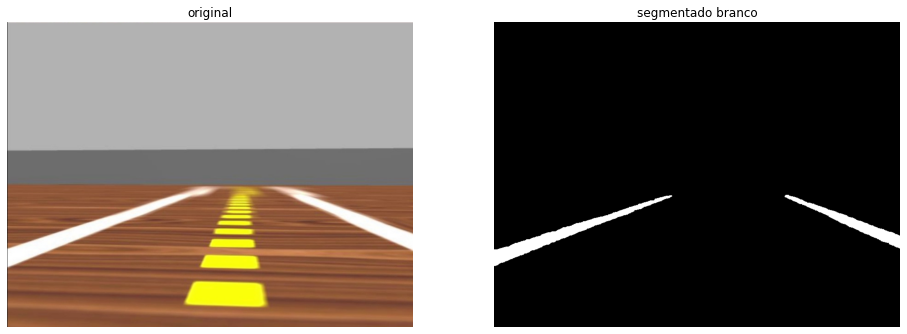

In [8]:
img = img1.copy()[30:-30,200:-200] # Remover barra de tarefa da imagem
print(img.shape)

# Segmenta Linha Branca
mask = biblioteca2.segmenta_linha_branca(img)

# Plot
f, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(mask, cmap="gray")
ax[0].set_title('original')
ax[1].set_title('segmentado branco')

ax[0].axis('off')
ax[1].axis('off')

plt.show()

# Saida Esperada:
# Uma imagem com o as faixas brancas segmentadas

## Calcular Linha
Usando cv2.HoughLinesP() calcule apenas UMA linha que passe em cada uma das faixas

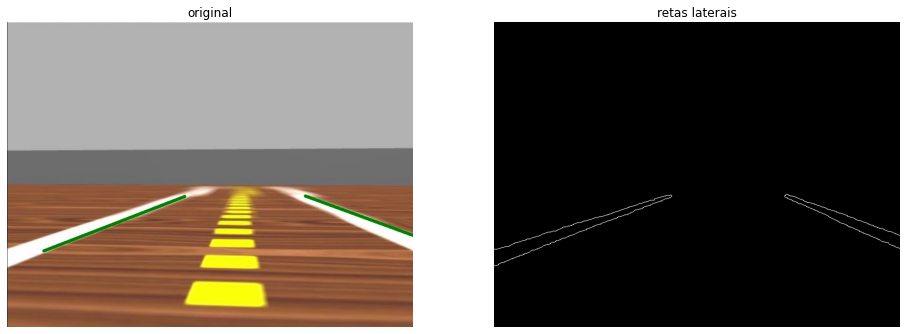

In [9]:
linhas = biblioteca2.estimar_linha_nas_faixas(img, mask)

# Plot
f, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(mask, cmap="Greys_r")
ax[0].set_title('original')
ax[1].set_title('retas laterais')

ax[0].axis('off')
ax[1].axis('off')

plt.show()

# Saida Esperada:
# APENAS uma linha magenta em cada faixa branca

## Calcular Equações da Linha nas Faixas
Com os pontos de cada faixa, calcule a equação de cada reta

In [10]:
equacoes = biblioteca2.calcular_equacao_das_retas(linhas)

for m, h in equacoes:
    print("Equacao: y = {m}x + {c}".format(m=m,c=h))

# Saida Esperada:
# Equacao: y = -0.3643410852713174x + 519.0
# Equacao: y = 0.38152610441767054x + 131.63855421686765

Equacao: y = 0.3648068669527897x + 140.33476394849785
Equacao: y = -0.38562091503267976x + 525.4640522875817


## Calcular Ponto de Fuga

Calcule o Ponto de Fuga da imagem, ou seja, o ponto de encontro entre as linhas.

Ponto de Fuga: (513.2129934210526, 327.5583881578947)


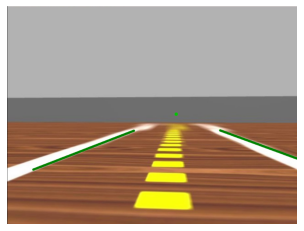

In [11]:
img, pontof = biblioteca2.calcular_ponto_de_fuga(img, equacoes)

plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

print("Ponto de Fuga: " + str(pontof))
# Saida Esperada (aproximado):
# Ponto de Fuga: (519, 329)